In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
mu_1, mu_2 = 0., 4.
sigma_1, sigma_2 = 1., 2.



mu = ((sigma_1**-2)*mu_1 + (sigma_2**-2)*mu_2) / \
    (sigma_1**-2 + sigma_2**-2)
sigma = np.sqrt((sigma_1**2 * sigma_2**2) / (sigma_1**2 + sigma_2**2))

nu = 1
f = 4
L_f = norm.pdf(f, mu_2, sigma_2)
f_p = 0
L_fp = norm.pdf(f_p, mu_2, sigma_2)
y = L_f * 0.6

f_size = (10, 6)
f_dpi = 300

c_target = 'b'
c_likeli = 'r'
c_norm = 'orange'



r = np.linspace(-4., 8., num=1000)

In [18]:
def plot_gen_pic(f_size, c_target, c_likeli, c_norm):
    plt.figure(figsize=(f_size))
    plt.plot(r, norm.pdf(r, mu, sigma),
             label='target distribution', c=c_target)
    plt.plot(r, norm.pdf(r, mu_1, sigma_1),
             label='$\mathcal{N}(0, \Sigma)$', c=c_norm)
    plt.plot(r, norm.pdf(r, mu_2, sigma_2), label='likelihood', c=c_likeli)
    plt.plot(f, 0, 'X', markersize=12, c=c_target, label='current state f')  
    plt.plot(nu, 0, 'P', markersize=12, c=c_norm, label=r'$\nu$')
    plt.xlabel('sample')
    plt.ylabel('value')
    plt.grid()
    plt.legend()

## Step 1 - compute nu

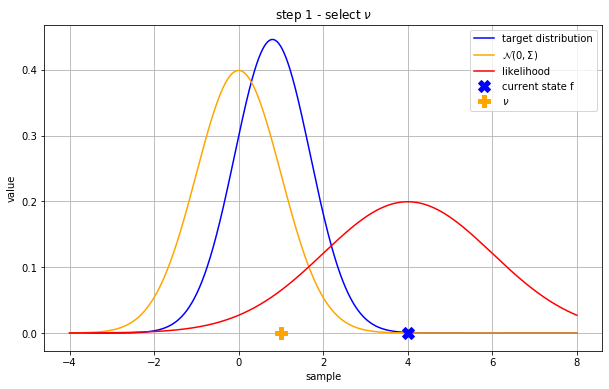

In [19]:
# step 1 - select nu
plot_gen_pic(f_size, c_target, c_likeli, c_norm)

plt.title(r'step 1 - select $\nu$')
plt.plot(f, 0, 'o', c=c_target)                 # plot f as initial state
plt.scatter(nu, 0, c=c_norm)
plt.savefig('ess_step_01.png', dpi=f_dpi)
plt.show()

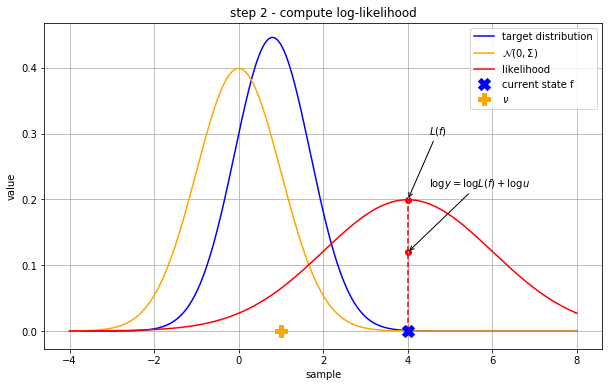

In [21]:
# step 2 - calculate y
plot_gen_pic(f_size, c_target, c_likeli, c_norm)
plt.title(r'step 2 - compute log-likelihood')
plt.plot(f, 0, 'o', c=c_target)
plt.vlines([f], 0, L_f, linestyles='dashed', colors=c_likeli)
plt.scatter(f, L_f, c=c_likeli)
plt.scatter(f, y,  c=c_likeli)
plt.scatter(nu, 0, c=c_norm)
plt.annotate("$L(f)$", xy=(f, L_f), xytext=(
    f+0.5, L_f+0.1), arrowprops=dict(arrowstyle="->"))
plt.annotate("$\log y = \log L(f) + \log u $", xy=(f, y),
             xytext=(f+0.5, y+0.1), arrowprops=dict(arrowstyle="->"))

#plt.hlines(y=y, xmin=-4, xmax=8)
plt.show()